In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

import string
import nltk
nltk.download('stopwords')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as VS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns 
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data reading

In [2]:
#df_tweet=pd.read_csv('leicester_city_twitter_data_5k.csv')
df_tweet=pd.read_csv('leicester_city_twitter_data_10k.csv')
#df_tweet=pd.read_csv('leicester_city_twitter_data_20k.csv')
df_tweet.head()

,Unnamed: 0,Date_time,Tweet_id,Text,User_name
0,0,2023-03-09 20:43:04+00:00,1.633930e+18,@GilbertGreen64 @Leicester_News The local coun...,sarahdiesel79
1,1,2023-03-09 18:59:37+00:00,1.633910e+18,"This is, of course, the same Cllr Bajaj who wa...",Ultra_Fox
2,2,2023-03-09 18:15:23+00:00,1.633890e+18,Total agreement with Westcotes councillor here...,Bfletcher249
3,3,2023-03-09 17:05:44+00:00,1.633880e+18,Leicester City Council special meeting getting...,LeicesterTim
4,4,2023-03-09 16:58:25+00:00,1.633870e+18,Most remarkable kids I’ve ever met! So proud o...,yasin_hqfamilia


In [3]:
df_tweet.shape

(10000, 5)

# Date filter

In [4]:
df_tweet['year'] = pd.DatetimeIndex(df_tweet['Date_time']).year
df_tweet['Month'] = pd.DatetimeIndex(df_tweet['Date_time']).month

In [5]:
df_tweet.sample(10)

,Unnamed: 0,Date_time,Tweet_id,Text,User_name,year,Month
8977,8977,2016-06-23 15:53:15+00:00,7.460080e+17,A day in the life of a digital Media Officer a...,ContradoDigital,2016,6
1802,1802,2021-10-24 10:14:59+00:00,1.452220e+18,@maxrushden When N'golo Kante moved to England...,lukebailey90,2021,10
4202,4202,2020-06-30 07:23:54+00:00,1.277870e+18,I hope he’s right. \nOn #Today @BBCr4today #Ma...,Anna_Soubry,2020,6
5727,5727,2019-05-04 18:47:48+00:00,1.124750e+18,The one thing Leicester City Council does righ...,BrianBrookes,2019,5
3555,3555,2020-07-31 07:03:37+00:00,1.289090e+18,Leicester city council: No fines for parents w...,aggiegoatmother,2020,7
397,397,2022-11-16 15:22:50+00:00,1.592900e+18,Leicester City Council is advertising for a ch...,LLFJB,2022,11
9322,9322,2016-05-04 08:38:44+00:00,7.277790e+17,Leicester City Council v T [2016] EWFC 20: (Fa...,fixpricedivorce,2016,5
7953,7953,2017-07-09 11:36:24+00:00,8.840130e+17,Leicester city council : Road safety - Sign th...,bigd1972,2017,7
1254,1254,2022-04-04 16:17:12+00:00,1.511020e+18,@LCFC @visit_leicester @CityMayorLeic @Deepak_...,Leicester_News,2022,4
5608,5608,2019-06-18 09:16:00+00:00,1.140910e+18,Leicester City Council is the perfect place to...,Y_ourfuture,2019,6


In [6]:
month_map = {1:'January',
             2:'February',
             3:'March',
             4:'April',
             5:'May',
             6:'June',
             7:'July',
             8:'August',
             9:'September',
             10:'October',
             11:'November',
             12:'December'
             }

In [7]:
df_tweet['Month_Name']=df_tweet['Month'].apply(lambda v: month_map[v])

In [8]:
df_tweet.sample(6)

,Unnamed: 0,Date_time,Tweet_id,Text,User_name,year,Month,Month_Name
4376,4376,2020-06-16 12:44:02+00:00,1.272870e+18,Leicester City Council: Save the statue of Mah...,vpb1,2020,6,June
9840,9840,2016-03-09 15:55:34+00:00,7.075960e+17,Cleaner (Sports and Leisure Centres) - Leicest...,localgoveditors,2016,3,March
4487,4487,2020-06-03 11:33:22+00:00,1.268140e+18,Leicester City Council : Remove the Gandhi sta...,Sumeet_D_8,2020,6,June
4533,4533,2020-05-18 17:54:59+00:00,1.262440e+18,@STILLTish received this am from Leicester\nTh...,SResisters,2020,5,May
3295,3295,2020-09-07 18:43:43+00:00,1.303040e+18,Leicester City Council: Retain all Leicester s...,M0nkeySh0ulder,2020,9,September
1706,1706,2021-11-19 12:02:00+00:00,1.461670e+18,"In a bid to protect wildlife, conserve habitat...",journoreece,2021,11,November


In [9]:
type(df_tweet['year'])

pandas.core.series.Series

## choose month and year

In [10]:
Months_wanted=[ ]#['January','July']
years_wanted=[ ]#[2010,2018,2019]

In [11]:
if len(Months_wanted)==0:
  X1=df_tweet.copy()
else:
  X1=df_tweet.loc[df_tweet['Month_Name'].isin(Months_wanted)]

In [12]:
if len(years_wanted)==0:
  X2=X1.copy()
else:
  X2=X1.loc[X1['year'].isin(years_wanted)]

In [13]:
X2.head()

,Unnamed: 0,Date_time,Tweet_id,Text,User_name,year,Month,Month_Name
0,0,2023-03-09 20:43:04+00:00,1.633930e+18,@GilbertGreen64 @Leicester_News The local coun...,sarahdiesel79,2023,3,March
1,1,2023-03-09 18:59:37+00:00,1.633910e+18,"This is, of course, the same Cllr Bajaj who wa...",Ultra_Fox,2023,3,March
2,2,2023-03-09 18:15:23+00:00,1.633890e+18,Total agreement with Westcotes councillor here...,Bfletcher249,2023,3,March
3,3,2023-03-09 17:05:44+00:00,1.633880e+18,Leicester City Council special meeting getting...,LeicesterTim,2023,3,March
4,4,2023-03-09 16:58:25+00:00,1.633870e+18,Most remarkable kids I’ve ever met! So proud o...,yasin_hqfamilia,2023,3,March


In [14]:
X2.year.value_counts()

2020    2216
2016    1588
2022    1354
2018    1260
2021    1223
2019    1161
2017     948
2023     250
Name: year, dtype: int64

In [15]:
X2.Month_Name.value_counts()

July         1219
June         1077
March         945
February      909
April         909
May           793
September     784
November      781
October       750
August        678
January       669
December      486
Name: Month_Name, dtype: int64

# Word filter

In [16]:
search_word=''#'election'#'leicester'--- give '' for no search word

In [17]:
import sys 

if len(search_word)==0:
  df=X2.copy()
else:
  # df=X2.loc[X2['Text'].isin(search_word)]
  df= X2[X2["Text"].str.contains(f'{search_word}')]
  if df.shape[0] == 0:
    print('No tweets found')
    sys.exit()

In [18]:
df.head()

,Unnamed: 0,Date_time,Tweet_id,Text,User_name,year,Month,Month_Name
0,0,2023-03-09 20:43:04+00:00,1.633930e+18,@GilbertGreen64 @Leicester_News The local coun...,sarahdiesel79,2023,3,March
1,1,2023-03-09 18:59:37+00:00,1.633910e+18,"This is, of course, the same Cllr Bajaj who wa...",Ultra_Fox,2023,3,March
2,2,2023-03-09 18:15:23+00:00,1.633890e+18,Total agreement with Westcotes councillor here...,Bfletcher249,2023,3,March
3,3,2023-03-09 17:05:44+00:00,1.633880e+18,Leicester City Council special meeting getting...,LeicesterTim,2023,3,March
4,4,2023-03-09 16:58:25+00:00,1.633870e+18,Most remarkable kids I’ve ever met! So proud o...,yasin_hqfamilia,2023,3,March


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   Date_time   10000 non-null  object 
 2   Tweet_id    10000 non-null  float64
 3   Text        10000 non-null  object 
 4   User_name   10000 non-null  object 
 5   year        10000 non-null  int64  
 6   Month       10000 non-null  int64  
 7   Month_Name  10000 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 625.1+ KB


In [20]:
df.drop(['Unnamed: 0','Date_time','Tweet_id','User_name','year','Month','Month_Name'],axis=1,inplace=True)

In [21]:
df.head()

,Text
0,@GilbertGreen64 @Leicester_News The local coun...
1,"This is, of course, the same Cllr Bajaj who wa..."
2,Total agreement with Westcotes councillor here...
3,Leicester City Council special meeting getting...
4,Most remarkable kids I’ve ever met! So proud o...


In [22]:
!pip3 install --upgrade vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Generating sentiment score

In [23]:
import nltk
nltk.download(['stopwords'])#(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


* checking for null values and deleting those rows if there are any null values

In [24]:
df.dropna(inplace=True)

In [25]:
df['tweet_cleaned'] = df['Text'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords])) 

In [26]:
df['Sentiment_score'] = df['tweet_cleaned'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

In [27]:
def sentiment_class(sent_score):
  if sent_score>=0.05:
    sent_class=int(2)#2 / 1
  elif -0.05<sent_score<0.05:
    sent_class=int(1)# 1 / 0
  else:
    sent_class=int(0) # 0/-1
  
  return(sent_class)

In [28]:
df['Sentiment_class']= df['Sentiment_score'].apply(sentiment_class) 

In [29]:
df.head()

,Text,tweet_cleaned,Sentiment_score,Sentiment_class
0,@GilbertGreen64 @Leicester_News The local coun...,@GilbertGreen64 @Leicester_News The local coun...,0.0258,1
1,"This is, of course, the same Cllr Bajaj who wa...","This is, course, Cllr Bajaj among biggest chee...",0.5994,2
2,Total agreement with Westcotes councillor here...,Total agreement Westcotes councillor Leicester...,0.7425,2
3,Leicester City Council special meeting getting...,Leicester City Council special meeting getting...,0.4019,2
4,Most remarkable kids I’ve ever met! So proud o...,Most remarkable kids I’ve ever met! So proud s...,0.9660,2


In [30]:
df['Sentiment_class'].value_counts()

2    4878
1    3034
0    2088
Name: Sentiment_class, dtype: int64

In [31]:
df['tweet_len']=df['Text'].apply(len) 

In [32]:
df['clean_tweet_len']=df['tweet_cleaned'].apply(len)

* count of sentiment classes

<Axes: xlabel='Sentiment_class', ylabel='count'>

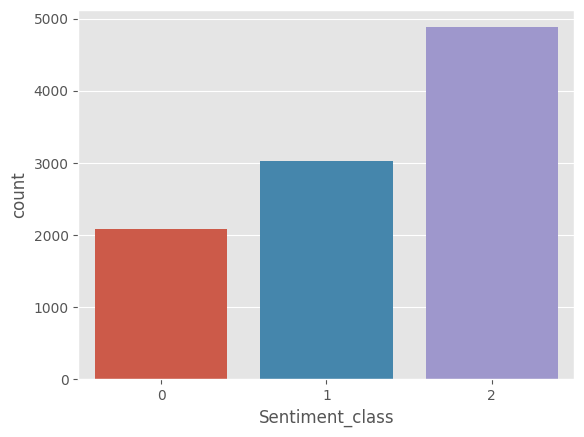

In [33]:
sns.countplot(x ='Sentiment_class', data = df)

* plot for sentiment score vs sentiment class

In [34]:
from plotnine import ggplot, aes, geom_line,geom_density,geom_point

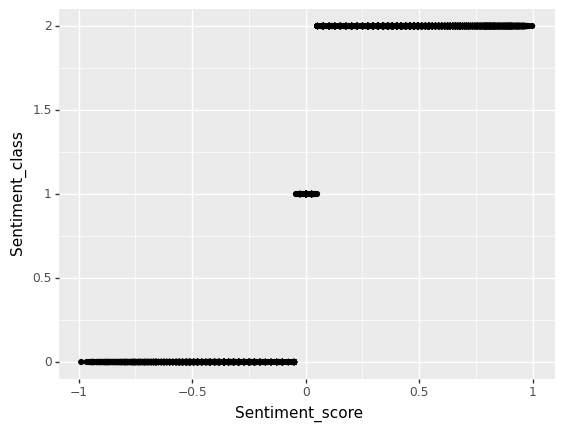

<ggplot: (8772803722370)>

In [35]:
p = ggplot(aes(x='Sentiment_score', y='Sentiment_class'), df)
p + geom_point()

* finding the top 20 words with highest count (including stopwords)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

In [37]:
cnt=0
# while cnt <20:
cnt_v_1=CountVectorizer().fit(df['Text']) 
cnt_v_2=cnt_v_1.transform(df['Text'])
cnt_v_3=cnt_v_2.sum(axis=0)
freq_cnt = [(word, cnt_v_3[0, iz]) for word, iz in cnt_v_1.vocabulary_.items()]
freq_cmt =sorted(freq_cnt, key = lambda x: x[1], reverse=True)
freq_cmt=freq_cmt[:20]
word_df = pd.DataFrame(freq_cmt, columns = ['Word' , 'count'])

<Axes: xlabel='Word', ylabel='count'>

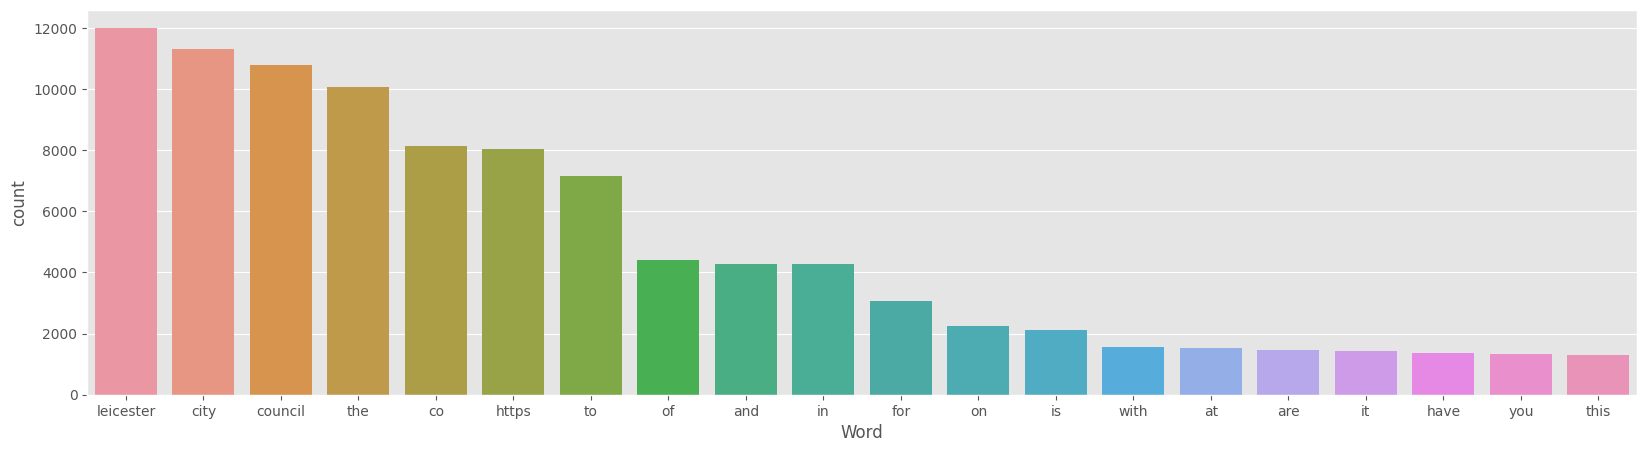

In [38]:
plt.figure(figsize = (20, 5))
sns.barplot(x ='Word',y='count', data = word_df)

* count of sentiment score

<Axes: xlabel='Sentiment_score', ylabel='Count'>

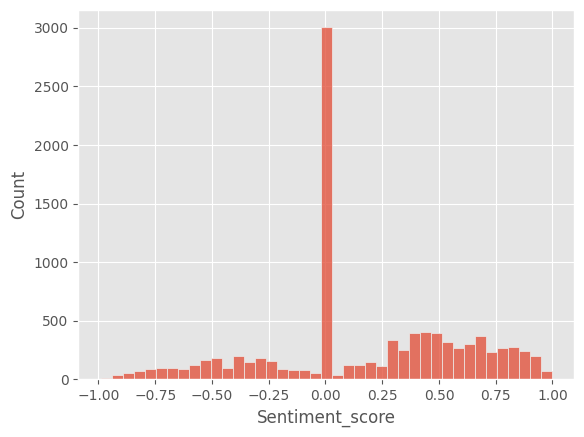

In [39]:
sns.histplot(data=df, x="Sentiment_score")#,kind='kde')#,hue='Sentiment_class',kind="ecdf")

* distribution of sentiment score

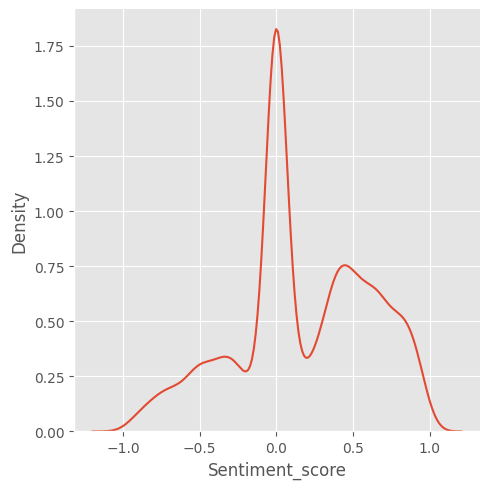

In [40]:
sns.displot(data=df, x="Sentiment_score",kind='kde')#,hue='Sentiment_class',kind="ecdf")

* comparison of tweet lengths for different sentiment classes

<Figure size 2000x1000 with 0 Axes>

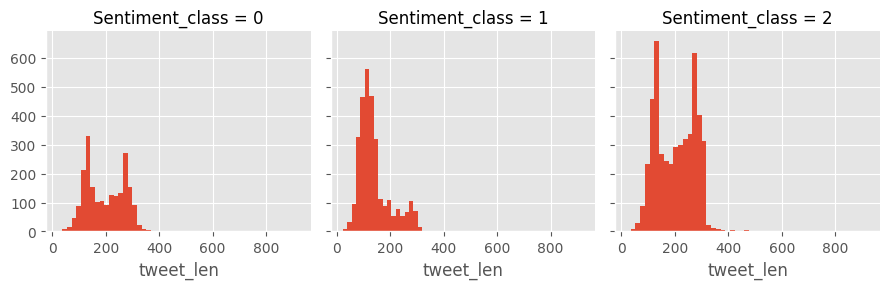

In [41]:
plt.figure(figsize=(20,10))
fig_class = sns.FacetGrid(data=df, col='Sentiment_class')
fig_class.map(plt.hist, 'tweet_len', bins=50)

<Figure size 2000x1000 with 0 Axes>

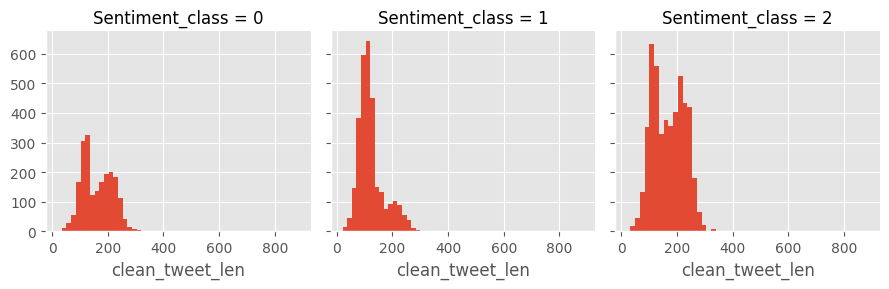

In [42]:
plt.figure(figsize=(20,10))
fig_class = sns.FacetGrid(data=df, col='Sentiment_class')
fig_class.map(plt.hist, 'clean_tweet_len', bins=50)

Mean Length 183.5807
Min Length 22
Max Length 923


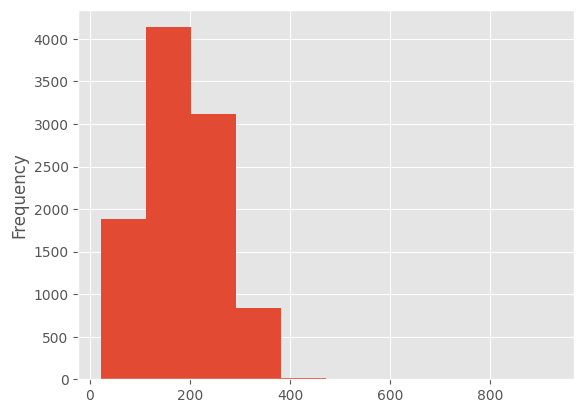

In [43]:
# Character Length of Titles - Min, Mean, Max
print('Mean Length', df['Text'].apply(len).mean())
print('Min Length', df['Text'].apply(len).min())
print('Max Length', df['Text'].apply(len).max())

x = df['Text'].apply(len).plot.hist()

# preprocessing tweets

In [44]:
def pre_process(tweet):
## removing spaces
    remove_space = re.compile(r'\s+')
    tweet_1 = tweet.str.replace(remove_space, ' ')
## removing url
    remove_url =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweet_2 = tweet_1.str.replace(remove_url, '')
## removing names
    remove_name = re.compile(r'@[\w\-]+')
    tweet_3 = tweet_2.str.replace(remove_name, '')
## removing special characters
    tweet_4=tweet_3.str.replace("[^a-zA-Z]", " ")
    tweet_5=tweet_4.str.replace(r'\s+', ' ')
    tweet_6=tweet_5.str.replace(r'^\s+|\s+?$','')
    tweet_7=tweet_6.str.replace(r'\d+(\.\d+)?','numbr')
    tweet_8=tweet_7.str.lower()

    return tweet_8


In [45]:
processed_tweets_1= pre_process(df['Text']) # preprocessing the tweets

In [46]:
print(processed_tweets_1)

0       the local council voted tonight on whether to ...
1       this is of course the same cllr bajaj who was ...
2       total agreement with westcotes councillor here...
3       leicester city council special meeting getting...
4       most remarkable kids i ve ever met so proud of...
                              ...                        
9995    leicester city council clerk of works transpor...
9996    we re celebrating fairtrade fortnight by takin...
9997    leicester city council civil enforcement offic...
9998    have you seen in the town centre shoutout to l...
9999    leicester merc more jobs will be axed at leice...
Name: Text, Length: 10000, dtype: object


In [47]:
# import these modules
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer  
Lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


* tokenizing the tweets

In [48]:
twt_tokenize = processed_tweets_1.apply(lambda x: x.split()) # tokenizing the tweets
print(twt_tokenize)

0       [the, local, council, voted, tonight, on, whet...
1       [this, is, of, course, the, same, cllr, bajaj,...
2       [total, agreement, with, westcotes, councillor...
3       [leicester, city, council, special, meeting, g...
4       [most, remarkable, kids, i, ve, ever, met, so,...
                              ...                        
9995    [leicester, city, council, clerk, of, works, t...
9996    [we, re, celebrating, fairtrade, fortnight, by...
9997    [leicester, city, council, civil, enforcement,...
9998    [have, you, seen, in, the, town, centre, shout...
9999    [leicester, merc, more, jobs, will, be, axed, ...
Name: Text, Length: 10000, dtype: object


* removing the stop words

In [49]:
twt_stopwords=twt_tokenize.apply(lambda x: [item for item in x if item not in stopwords])
print(twt_stopwords)

0       [local, council, voted, tonight, whether, get,...
1       [course, cllr, bajaj, among, biggest, cheerlea...
2       [total, agreement, westcotes, councillor, leic...
3       [leicester, city, council, special, meeting, g...
4       [remarkable, kids, ever, met, proud, speaking,...
                              ...                        
9995    [leicester, city, council, clerk, works, trans...
9996    [celebrating, fairtrade, fortnight, taking, pa...
9997    [leicester, city, council, civil, enforcement,...
9998    [seen, town, centre, shoutout, leicester, city...
9999    [leicester, merc, jobs, axed, leicester, city,...
Name: Text, Length: 10000, dtype: object


* lemmatizing the tweets

In [50]:
def lemmatize(twt):
  lemmatized = ' '.join([Lemmatizer.lemmatize(w) for w in twt])
  return lemmatized

In [51]:
twt_lemma = twt_stopwords.apply(lemmatize)
print(twt_lemma)

0       local council voted tonight whether get rid ci...
1       course cllr bajaj among biggest cheerleader ci...
2       total agreement westcotes councillor leicester...
3       leicester city council special meeting getting...
4       remarkable kid ever met proud speaking trying ...
                              ...                        
9995    leicester city council clerk work transport st...
9996    celebrating fairtrade fortnight taking part le...
9997    leicester city council civil enforcement offic...
9998    seen town centre shoutout leicester city counc...
9999    leicester merc job axed leicester city council...
Name: Text, Length: 10000, dtype: object


In [52]:
df['processed_tweets']= twt_lemma
df.head()

,Text,tweet_cleaned,Sentiment_score,Sentiment_class,tweet_len,clean_tweet_len,processed_tweets
0,@GilbertGreen64 @Leicester_News The local coun...,@GilbertGreen64 @Leicester_News The local coun...,0.0258,1,135,110,local council voted tonight whether get rid ci...
1,"This is, of course, the same Cllr Bajaj who wa...","This is, course, Cllr Bajaj among biggest chee...",0.5994,2,277,179,course cllr bajaj among biggest cheerleader ci...
2,Total agreement with Westcotes councillor here...,Total agreement Westcotes councillor Leicester...,0.7425,2,194,138,total agreement westcotes councillor leicester...
3,Leicester City Council special meeting getting...,Leicester City Council special meeting getting...,0.4019,2,195,167,leicester city council special meeting getting...
4,Most remarkable kids I’ve ever met! So proud o...,Most remarkable kids I’ve ever met! So proud s...,0.9660,2,279,225,remarkable kid ever met proud speaking trying ...


In [53]:
df.reset_index(drop=True,inplace=True)

In [54]:
# df.loc[17992]=df.loc[17993].copy()
df.loc[17991:17995]

,Text,tweet_cleaned,Sentiment_score,Sentiment_class,tweet_len,clean_tweet_len,processed_tweets


In [55]:
cnt=0
# while cnt <20:
cnt_v_1=CountVectorizer().fit(df['processed_tweets']) 
cnt_v_2=cnt_v_1.transform(df['processed_tweets'])
cnt_v_3=cnt_v_2.sum(axis=0)
freq_cnt = [(word, cnt_v_3[0, idx]) for word, idx in cnt_v_1.vocabulary_.items()]
freq_cmt =sorted(freq_cnt, key = lambda x: x[1], reverse=True)
freq_cmt=freq_cmt[:20]
word_df = pd.DataFrame(freq_cmt, columns = ['Word' , 'count'])

In [56]:
# print(freq_cmt[0][1])

* finding the top 20 words with highest count (without stopwords)

<Axes: xlabel='Word', ylabel='count'>

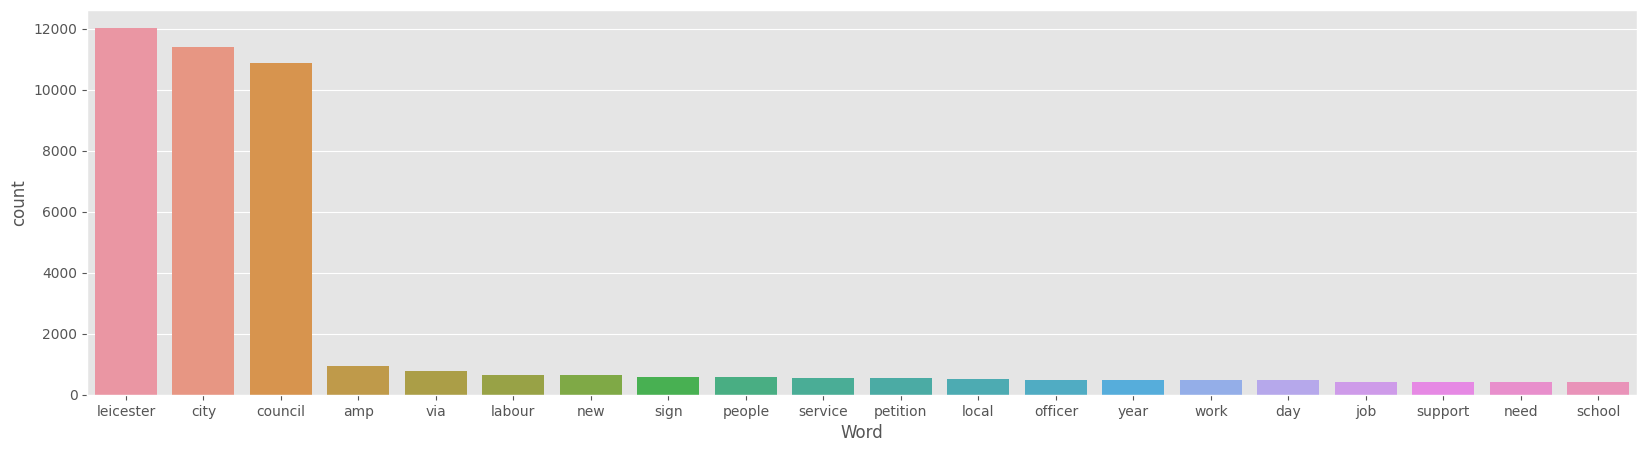

In [57]:
plt.figure(figsize = (20, 5))
sns.barplot(x ='Word',y='count', data = word_df)

plotting word clouds

In [58]:
from wordcloud import WordCloud

In [59]:
len(df['Sentiment_class']==2)

10000

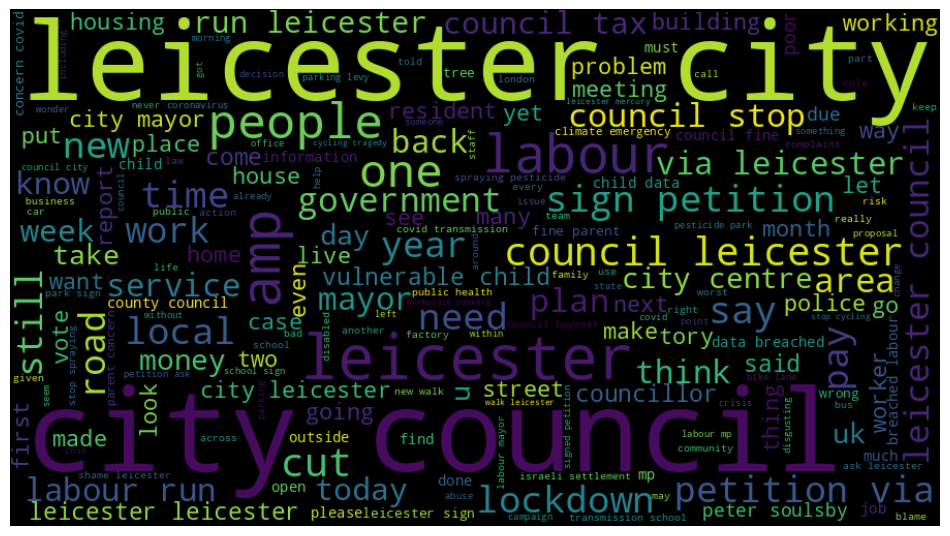

In [60]:
if len(df['processed_tweets'][df['Sentiment_class'] == 0])!=0:
  negative_twts = ' '.join([text for text in df['processed_tweets'][df['Sentiment_class'] == 0]])
  wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(negative_twts)
  plt.figure(figsize=(12, 8))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()
  

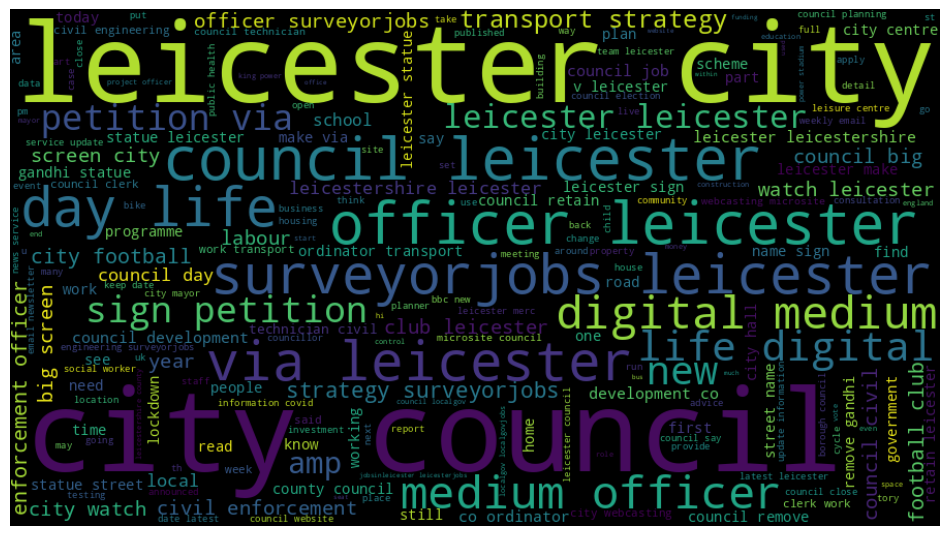

In [61]:
if len(df['processed_tweets'][df['Sentiment_class'] == 1])!=0:
  neutral_twts = ' '.join([text for text in df['processed_tweets'][df['Sentiment_class'] == 1]])
  wordcloud = WordCloud(width=900, height=500,random_state=34, max_font_size=110).generate(neutral_twts)
  plt.figure(figsize=(12, 8))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()

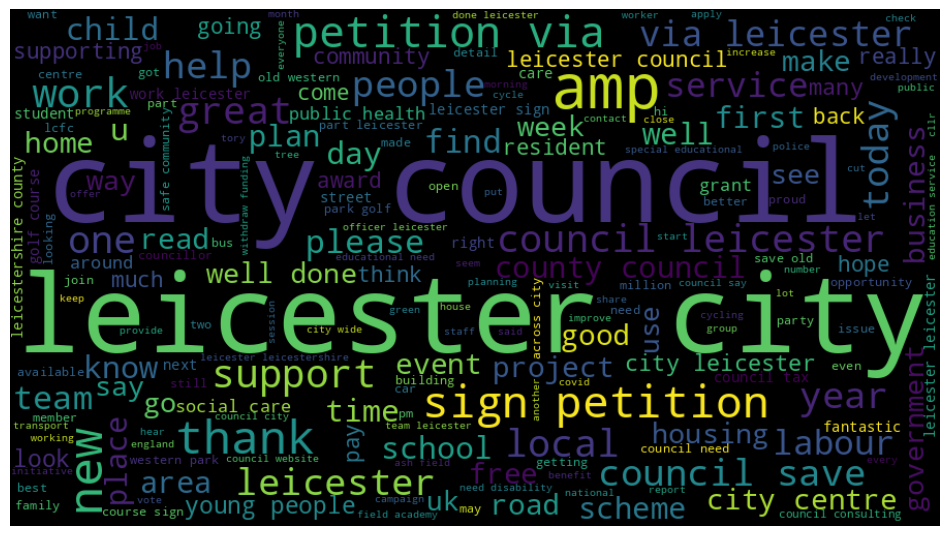

In [62]:
if len(df['processed_tweets'][df['Sentiment_class'] == 2])!=0:
  positive_twts = ' '.join([text for text in df['processed_tweets'][df['Sentiment_class'] == 2]])
  wordcloud = WordCloud(width=900, height=500,random_state=55, max_font_size=110).generate(positive_twts)
  plt.figure(figsize=(12, 8))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()


TFID vectorizing tweets

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
#determining TF-IDF Features of the words in the dataset. 
TfId_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=10000) #,max_df=0.75, min_df=0
TfId_vector = TfId_vectorizer.fit_transform(df['processed_tweets'] )

In [65]:
if len(df['Sentiment_class'])<3:
  print('Not Enough sample to train and test data')
  sys.exit()

# Models

In [66]:
X=TfId_vector #Tf_vector
y = df['Sentiment_class'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, classification_report,f1_score,accuracy_score
# from sklearn.metrics import classification_
from sklearn.metrics import accuracy_score

### Logistic regression

In [68]:
model = LogisticRegression(multi_class='multinomial')
# model = LogisticRegression(random_state = 42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
acc_1=accuracy* 100
print(f"Accuracy of Logistic Regression {acc_1:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Logistic Regression 77.35 %
  
              precision    recall  f1-score   support

           0       0.79      0.56      0.66       432
           1       0.84      0.70      0.77       622
           2       0.74      0.92      0.82       946

    accuracy                           0.77      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.78      0.77      0.77      2000



## Random Forest classifier

In [69]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
acc_1=accuracy* 100
print(f"Accuracy of Logistic Regression {acc_1:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Logistic Regression 73.75 %
  
              precision    recall  f1-score   support

           0       0.84      0.41      0.56       432
           1       0.78      0.71      0.74       622
           2       0.70      0.91      0.79       946

    accuracy                           0.74      2000
   macro avg       0.77      0.68      0.70      2000
weighted avg       0.76      0.74      0.72      2000



## Linear support vector classifier

In [70]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
acc5=acc* 100
print(f"Accuracy of Support vector classifier {acc5:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Support vector classifier 79.05 %
  
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       432
           1       0.79      0.76      0.78       622
           2       0.80      0.88      0.84       946

    accuracy                           0.79      2000
   macro avg       0.78      0.76      0.77      2000
weighted avg       0.79      0.79      0.79      2000



## Multinomial naive bayes

In [71]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
acc4=acc* 100
print(f"Accuracy of Multinomial Naive Bayes {acc4:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Multinomial Naive Bayes 70.10 %
  
              precision    recall  f1-score   support

           0       0.79      0.43      0.55       432
           1       0.91      0.52      0.66       622
           2       0.63      0.95      0.76       946

    accuracy                           0.70      2000
   macro avg       0.78      0.63      0.66      2000
weighted avg       0.75      0.70      0.68      2000



In [72]:
y_train.value_counts() # displaying value counts of target variable

2    3932
1    2412
0    1656
Name: Sentiment_class, dtype: int64

* eliminating class imbalance using smote

In [73]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [74]:
# Osmple = SMOTE()
# Osmple = SMOTE(random_state=50)
try:
	oversampler=SMOTE()#k_neighbors=n_samples*2)
	X1, y1 = oversampler.fit_resample(X_train, y_train)

	# summarize distribution
	counter = Counter(y1)
	for k,v in counter.items():
		per = v / len(y1) * 100
		print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
except:
	print('No oversampling done')
	sys.exit('Cant implement smote')
	# X1=X_train
	# y1=y_train

Class=1, n=3932 (33.333%)
Class=0, n=3932 (33.333%)
Class=2, n=3932 (33.333%)


## Logistic regression with upsampling

In [75]:
model = LogisticRegression(random_state = 42)
model.fit(X1, y1)
accuracy = model.score(X_test, y_test)
acc_1=accuracy* 100
print(f"Accuracy of Logistic Regression {acc_1:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Logistic Regression 79.55 %
  
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       432
           1       0.83      0.76      0.79       622
           2       0.83      0.85      0.84       946

    accuracy                           0.80      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.80      0.80      0.80      2000



## Random Forest classifier with upsampling

In [76]:
model = RandomForestClassifier(random_state = 42)
model.fit(X1, y1)
accuracy = model.score(X_test, y_test)
acc_1=accuracy* 100
print(f"Accuracy of Logistic Regression {acc_1:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Logistic Regression 74.65 %
  
              precision    recall  f1-score   support

           0       0.74      0.53      0.61       432
           1       0.75      0.76      0.76       622
           2       0.75      0.84      0.79       946

    accuracy                           0.75      2000
   macro avg       0.74      0.71      0.72      2000
weighted avg       0.75      0.75      0.74      2000



## Linear support vector classifier with upsampling

In [77]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X1, y1)
acc = model.score(X_test, y_test)
acc5=acc* 100
print(f"Accuracy of Support vector classifier {acc5:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Support vector classifier 79.60 %
  
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       432
           1       0.79      0.78      0.78       622
           2       0.84      0.85      0.84       946

    accuracy                           0.80      2000
   macro avg       0.78      0.78      0.78      2000
weighted avg       0.80      0.80      0.80      2000



## Multinomial naive bayes with upsampling

In [78]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X1, y1)
acc = model.score(X_test, y_test)
acc4=acc* 100
print(f"Accuracy of Multinomial Naive Bayes {acc4:.2f} %")
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print('  ')
print(report)

Accuracy of Multinomial Naive Bayes 74.80 %
  
              precision    recall  f1-score   support

           0       0.59      0.80      0.68       432
           1       0.84      0.63      0.72       622
           2       0.80      0.80      0.80       946

    accuracy                           0.75      2000
   macro avg       0.74      0.74      0.73      2000
weighted avg       0.77      0.75      0.75      2000



# Using K-Fold Validation

In [79]:
# import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
accu=[]
i=1
for train_index, test_index in kf.split(X):
  # print(train_index)
  # print(test_index)
    # print('-------------------------------------')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LogisticRegression(multi_class='multinomial')
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    acc_1=accuracy* 100
    print(f"Accuracy of Logistic Regression model {i} {acc_1:.2f} %")
    accu.append(acc_1)
    i=i+1

print(' ')
print(f"The average accuracy of the 10 models for logistic regression is {sum(accu)/10:.2f} %")


Accuracy of Logistic Regression model 1 70.00 %
Accuracy of Logistic Regression model 2 76.60 %
Accuracy of Logistic Regression model 3 72.10 %
Accuracy of Logistic Regression model 4 70.40 %
Accuracy of Logistic Regression model 5 74.20 %
Accuracy of Logistic Regression model 6 73.10 %
Accuracy of Logistic Regression model 7 74.00 %
Accuracy of Logistic Regression model 8 72.50 %
Accuracy of Logistic Regression model 9 66.20 %
Accuracy of Logistic Regression model 10 83.60 %
 
The average accuracy of the 10 models for logistic regression is 73.27 %


In [80]:
# import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
accu=[]
i=1
for train_index, test_index in kf.split(X):
  # print(train_index)
  # print(test_index)
    # print('-------------------------------------')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = RandomForestClassifier()#(multi_class='multinomial')
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    acc_1=accuracy* 100
    print(f"Accuracy of Random Forest Classifier model {i} {acc_1:.2f} %")
    # y_pred = model.predict(X_test)
    # report = classification_report(y_test, y_pred)
    # print('  ')
    # print(report)
    # print(' ')
    accu.append(acc_1)
    i=i+1

print(' ')
print(f"The average accuracy of the 10 models for Random Forest Classifier is {sum(accu)/10:.2f} %")


Accuracy of Random Forest Classifier model 1 63.30 %
Accuracy of Random Forest Classifier model 2 68.20 %
Accuracy of Random Forest Classifier model 3 64.40 %
Accuracy of Random Forest Classifier model 4 60.30 %
Accuracy of Random Forest Classifier model 5 70.00 %
Accuracy of Random Forest Classifier model 6 68.90 %
Accuracy of Random Forest Classifier model 7 68.70 %
Accuracy of Random Forest Classifier model 8 62.10 %
Accuracy of Random Forest Classifier model 9 60.20 %
Accuracy of Random Forest Classifier model 10 73.20 %
 
The average accuracy of the 10 models for Random Forest Classifier is 65.93 %


In [81]:
# import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
accu=[]
i=1
for train_index, test_index in kf.split(X):
  # print(train_index)
  # print(test_index)
    # print('-------------------------------------')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = LinearSVC()#(multi_class='multinomial')
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    acc_1=accuracy* 100
    print(f"Accuracy of Linear SVC model {i} {acc_1:.2f} %")
    # y_pred = model.predict(X_test)
    # report = classification_report(y_test, y_pred)
    # print('  ')
    # print(report)
    # print(' ')
    accu.append(acc_1)
    i=i+1

print(' ')
print(f"The average accuracy of the 10 models for Linear SVC is {sum(accu)/10:.2f} %")


Accuracy of Linear SVC model 1 74.00 %
Accuracy of Linear SVC model 2 80.30 %
Accuracy of Linear SVC model 3 74.10 %
Accuracy of Linear SVC model 4 74.80 %
Accuracy of Linear SVC model 5 75.50 %
Accuracy of Linear SVC model 6 75.20 %
Accuracy of Linear SVC model 7 76.70 %
Accuracy of Linear SVC model 8 77.30 %
Accuracy of Linear SVC model 9 71.70 %
Accuracy of Linear SVC model 10 86.50 %
 
The average accuracy of the 10 models for Linear SVC is 76.61 %


In [82]:
# import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
accu=[]
i=1
for train_index, test_index in kf.split(X):
  # print(train_index)
  # print(test_index)
    # print('-------------------------------------')
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = MultinomialNB()#(multi_class='multinomial')
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    acc_1=accuracy* 100
    print(f"Accuracy of Multinomial Naive bayes {i} {acc_1:.2f} %")
    # y_pred = model.predict(X_test)
    # report = classification_report(y_test, y_pred)
    # print('  ')
    # print(report)
    # print(' ')
    accu.append(acc_1)
    i=i+1

print(' ')
print(f"The average accuracy of the 10 models for Multinomial Naive bayes is {sum(accu)/10:.2f} %")


Accuracy of Multinomial Naive bayes 1 63.60 %
Accuracy of Multinomial Naive bayes 2 70.00 %
Accuracy of Multinomial Naive bayes 3 65.90 %
Accuracy of Multinomial Naive bayes 4 64.40 %
Accuracy of Multinomial Naive bayes 5 63.20 %
Accuracy of Multinomial Naive bayes 6 68.10 %
Accuracy of Multinomial Naive bayes 7 70.60 %
Accuracy of Multinomial Naive bayes 8 64.70 %
Accuracy of Multinomial Naive bayes 9 54.90 %
Accuracy of Multinomial Naive bayes 10 71.10 %
 
The average accuracy of the 10 models for Multinomial Naive bayes is 65.65 %
